In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
def import_covid19_data():
    '''Import covid19 data from 2019 Novel Coronavirus COVID-19 (2019-nCoV) 
    Data Repository by Johns Hopkins CSSE and output confirmed cases, deaths,
    and recovered cases into three pandas dataframes.
    '''
    
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master'\
    +'/csse_covid_19_data/csse_covid_19_time_series/'
    conf = 'time_series_19-covid-Confirmed.csv'
    death = 'time_series_19-covid-Deaths.csv'
    recov = 'time_series_19-covid-Recovered.csv'
    
    confirmed = pd.read_csv(url + conf)
    deaths = pd.read_csv(url + death)
    recov = pd.read_csv(url + recov)
    
    return confirmed, deaths, recov
    
def cumsum_timeseries_plot(dataframes, labels, size=[20,10]):
    '''Plot timeseries dataframes for JHU CSSE Covid 19 time series datasets.
    
    Parameters:
    dataframes -- List of dataframes to plot. Should have same columns.
    labels -- List of labels. Should correspond to dataframes.
    size -- Plot size (default [20,10])
    '''
    
    plt.figure(figsize=size)
    
    for dataframe in dataframes:
        plt.plot(dataframe.sum())
        
    plt.legend(labels)
    plt.xlabel("Date")
    plt.ylabel("Population Count")
    plt.xticks(rotation=45)
    
def diff_plot(dataframes, labels, size=[20,10]):
    '''Plot daily number of cases for JHU CSSE Covid 19 time series datasets.
    
    Parameters:
    dataframes -- List of dataframes to plot. Should have same columns.
    labels -- List of labels. Should correspond to dataframes.
    size -- Plot size (default [20,10])
    '''
    
    bar_width = 0.25
    next_width = 0
    
    plt.figure(figsize=size)
    
    for dataframe in dataframes:
        df = dataframe.diff(axis='columns')
        columns = df.columns
        num_columns = np.arange(0, len(columns), 1)
        plt.bar(num_columns + next_width, df.sum(), bar_width)
        next_width = next_width + bar_width
        
    plt.legend(labels)
    plt.xlabel("Date")
    plt.ylabel("Population Count")
    plt.xticks(num_columns, columns, rotation=45)
    
def log_plot(dataframes, labels, size=[20,10]):
    
    plt.figure(figsize=size)
    
    for dataframe in dataframes:
        x = np.arange(len(dataframe.columns))
        y = dataframe.sum().values
        plt.plot(x, np.log(y))
        
    plt.legend(labels)
    plt.xlabel("Date")
    plt.ylabel("log(population)")
    plt.xticks(x, dataframes[0].columns, rotation=45)

In [3]:
confirmed, deaths, recovered = import_covid19_data()

# TOTAL

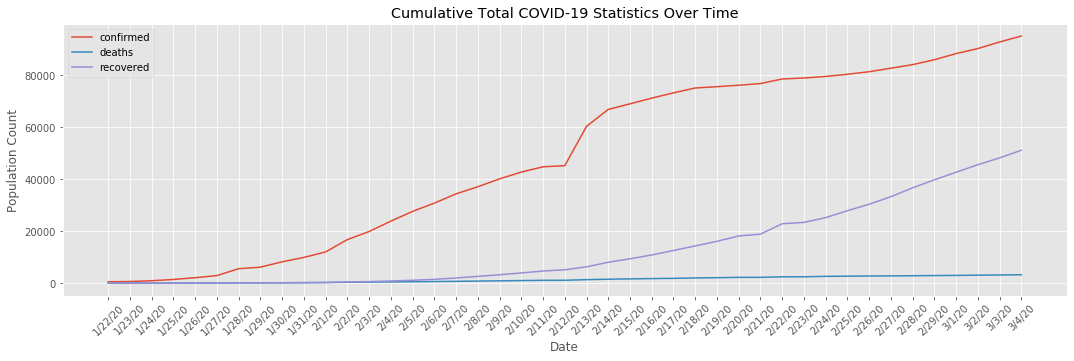

In [4]:
cumsum_timeseries_plot([confirmed.loc[:,"1/22/20":], 
                        deaths.loc[:,"1/22/20":], 
                        recovered.loc[:,"1/22/20":]], 
                        ["confirmed", "deaths", "recovered"],
                        [18,5])
plt.title("Cumulative Total COVID-19 Statistics Over Time");

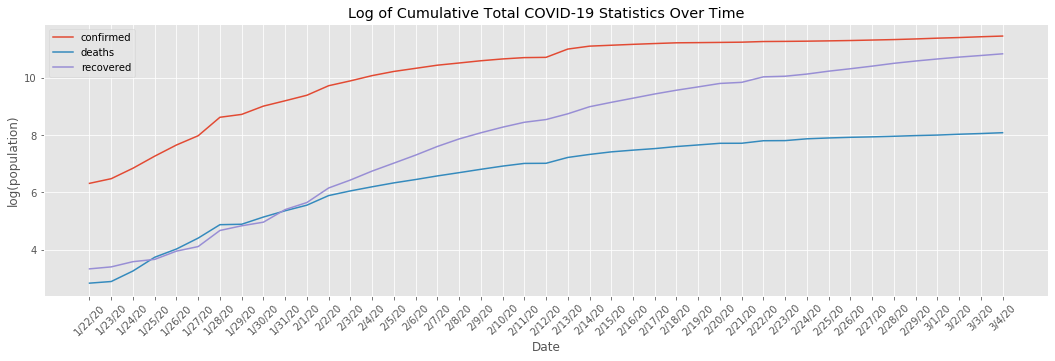

In [5]:
log_plot([confirmed.loc[:,"1/22/20":], 
        deaths.loc[:,"1/22/20":], 
        recovered.loc[:,"1/22/20":]], 
        ["confirmed", "deaths", "recovered"],
        [18,5])
plt.title("Log of Cumulative Total COVID-19 Statistics Over Time");

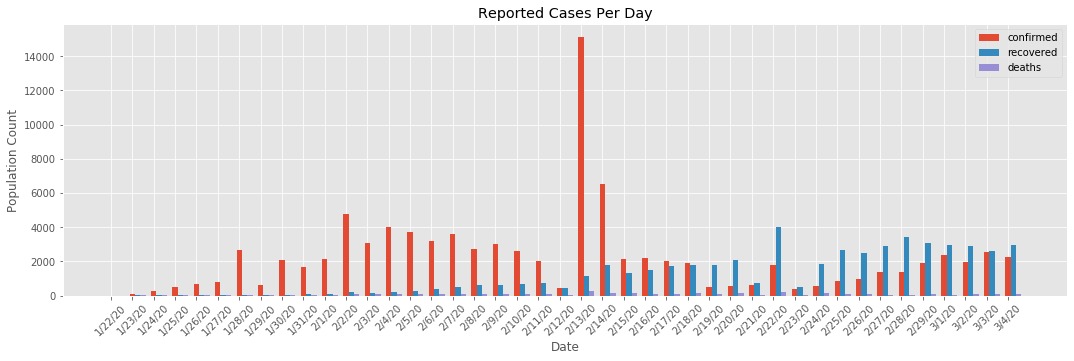

In [6]:
diff_plot([confirmed.loc[:,"1/22/20":], 
           recovered.loc[:,"1/22/20":],
           deaths.loc[:,"1/22/20":]], 
           ["confirmed", "recovered", "deaths"],
           [18,5])
plt.title("Reported Cases Per Day");

# EXCLUDING CHINA

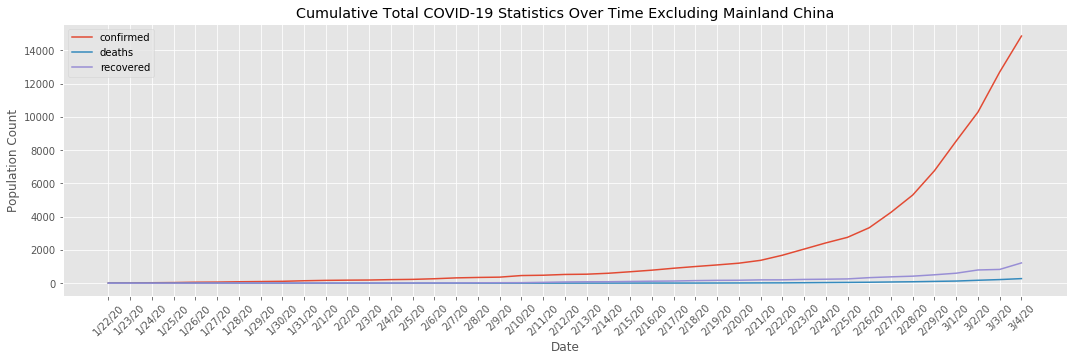

In [7]:
cumsum_timeseries_plot([confirmed[confirmed["Country/Region"] != "Mainland China"].loc[:,"1/22/20":], 
                        deaths[deaths["Country/Region"] != "Mainland China"].loc[:,"1/22/20":], 
                        recovered[recovered["Country/Region"] != "Mainland China"].loc[:,"1/22/20":]], 
                        ["confirmed", "deaths", "recovered"],
                        [18,5])
plt.title("Cumulative Total COVID-19 Statistics Over Time Excluding Mainland China");

/home/shawnmittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log


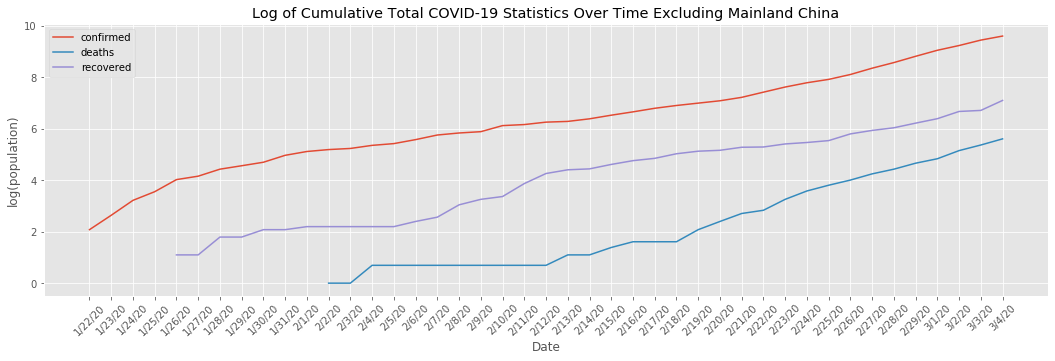

In [8]:
log_plot([confirmed[confirmed["Country/Region"] != "Mainland China"].loc[:,"1/22/20":],
          deaths[deaths["Country/Region"] != "Mainland China"].loc[:, "1/22/20":],
          recovered[recovered["Country/Region"] != "Mainland China"].loc[:, "1/22/20":]],
         ["confirmed", "deaths", "recovered"],
         [18,5])
plt.title("Log of Cumulative Total COVID-19 Statistics Over Time Excluding Mainland China");

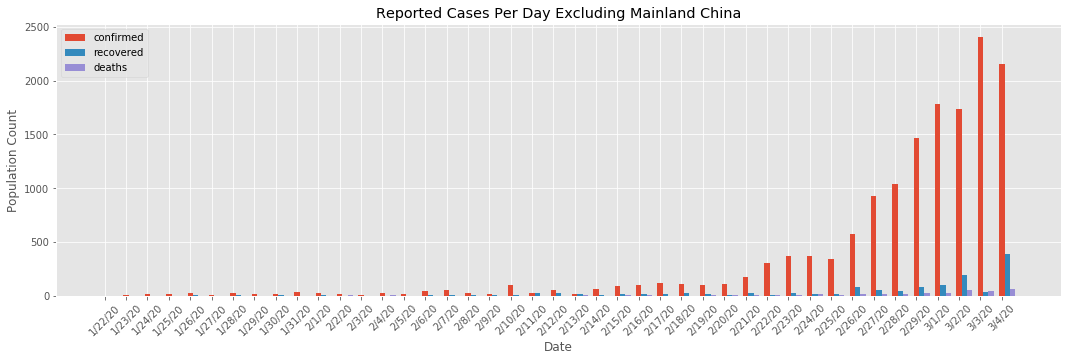

In [9]:
diff_plot([confirmed[confirmed["Country/Region"] != "Mainland China"].loc[:,"1/22/20":], 
           recovered[recovered["Country/Region"] != "Mainland China"].loc[:,"1/22/20":],
           deaths[deaths["Country/Region"] != "Mainland China"].loc[:,"1/22/20":]], 
           ["confirmed", "recovered", "deaths"],
           [18,5])
plt.title("Reported Cases Per Day Excluding Mainland China");

# USA

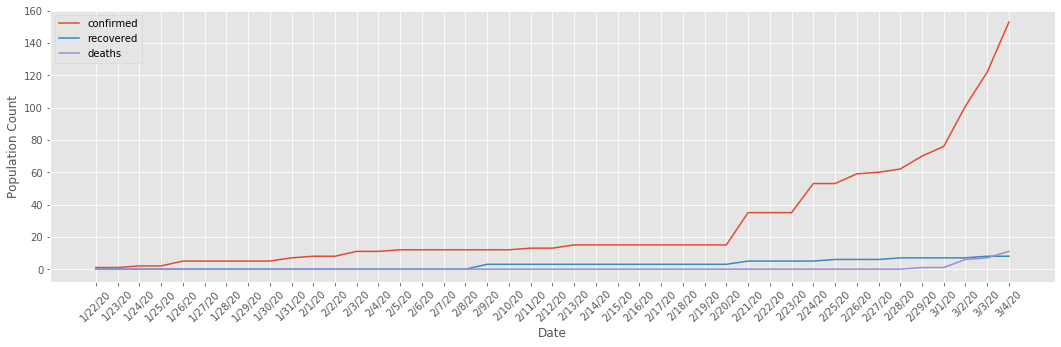

In [10]:
cumsum_timeseries_plot([confirmed[confirmed["Country/Region"] == "US"].loc[:,"1/22/20":], 
           recovered[recovered["Country/Region"] == "US"].loc[:,"1/22/20":],
           deaths[deaths["Country/Region"] == "US"].loc[:,"1/22/20":]], 
           ["confirmed", "recovered", "deaths"],
           [18,5])

/home/shawnmittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log


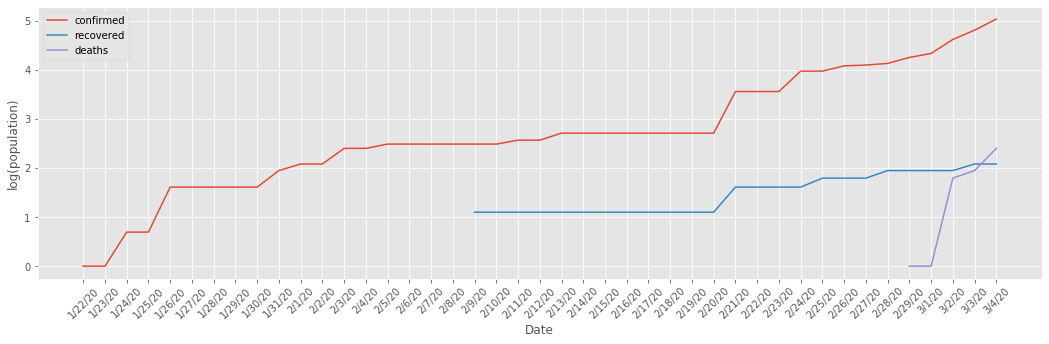

In [11]:
log_plot([confirmed[confirmed["Country/Region"] == "US"].loc[:,"1/22/20":], 
           recovered[recovered["Country/Region"] == "US"].loc[:,"1/22/20":],
           deaths[deaths["Country/Region"] == "US"].loc[:,"1/22/20":]], 
           ["confirmed", "recovered", "deaths"],
           [18,5])

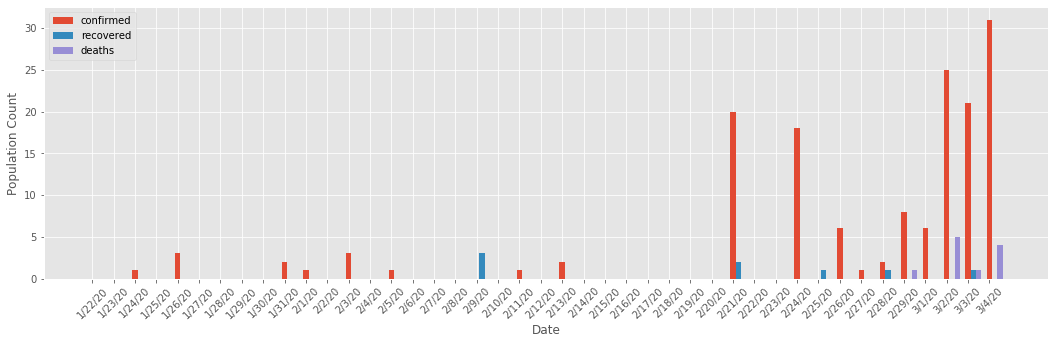

In [12]:
diff_plot([confirmed[confirmed["Country/Region"] == "US"].loc[:,"1/22/20":], 
           recovered[recovered["Country/Region"] == "US"].loc[:,"1/22/20":],
           deaths[deaths["Country/Region"] == "US"].loc[:,"1/22/20":]], 
           ["confirmed", "recovered", "deaths"],
           [18,5])

In [19]:
confirmed[confirmed["Country/Region"] != "Mainland China"].loc[:,"1/22/20":].diff(axis="columns").sum()[1:].mean()

353.45238095238096